This is coursera capstone project where using supervised learning we will learn about Collisions Severity

I will use Jupyter notebooks as well as PyCharm and the reason is that Coursera asks me to use Jpuyter Notebooks when I need to practice 

**Busines Understanding**

To this project I have used data from British transport on car accidents so to predict severity of car accidents based on road, car or road conditions. Hospital directors that plan resources may want to predict risk and severity of accidents on streets to help people that were victims of car accidents. Heads of police departments want to know how to protect citizens and patrol the streets so to limit dangerous behaviour on the streets. Aim of this project is to predict the severity of road accident so to limit the number of incidences on the way and optimize resources to protect victims. To understand this problem I will use British transport data on car accidents from https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data  incident data that uses metrics such as weather and road condition from 2010 to 2018

**INFO about the dataset - To be udpated** 

In the raw dataset there are 38 columns, for full list please refer to metadata. The aim is to predict severity of the accident using SeverityCode. 

We have 3 unique identifiers, that can be removed: OBJECTID, INCKEY, COLDETKEY. We don't need columns:  X, Y, SDOTCOLNUM and the  SEVERITYCODE.1 is the same as SEVERITY CODE

In the columns: EXCEPTRSNDESC, INATTENTIONIND, PEDROWNOTGRNT, SPEEDING is more than 80% of missing values so we want to remove those. The columns that I will use for the project are:

| Column | Description | Action |
| --- | --- | --- |
| **SEVERITYCODE** | A code that corresponds to severity | Use as label in classification |
| **SEVERITYDESC** | A detailed description of the severity | |
| **ADDRTYPE**	| Collision address type | |
| **LOCATION**	| Description of the general location | Engineer this column? |
| **COLLISIONTYPE**	| Collision Type | |
| **PEDCOUNT** | Numbers of pedestrians | |
| **PEDCYCLCOUNT** | Number of bicycles | | 
| **VEHCOUNT** | Number of vehicles | |
| **INCDATE** | Incident Date | You may want to get season ? |  
| **INCDTTM** | Incident Time | You may want to get part of the day? |
| **JUNCTIONTYPE** | Category of Junction | |
| **SDOT_COLCODE** | Code given by Seatlle department of Transportation | |
| **SDOT_COLDESC** | A description of the collision | |
| **UNDERINTL** | Driver involved under influence of drugs or alc | |
| **WEATHER** | Desciption of the weather
| **ROADCOND** | Description of the road condition | |
| **LIGHCOND** | Description of the light condition | |
| **SPEEDING** | Speeding was a factor | |
| **ST_COLDESC** | State collision description | For info refer to Metadata |
| **ST_COLCODE** | State collision code | |
| **SEGLANEKEY** | lane segment | |
| **CROSSWALKKEY** | Crosswalk | |
| **HITPARKEDCAR** | Collision with parked car | |

**Hypothesis - To be updated**

Some features may be more important than others to predict severity. The questions that I would like to ask are:

*Primary*:

**H0**: If LIGHCOND is related to SEVERITYCODE then as the more light there is the less severe the accidents are

**H0**: If SPEEDING cause more severe incidents then number of incidents recorded as fatality will be bigger when speeding

**H0**: If SPEEDING UNDERINTL increases the number of incidents then collisions under the substance are more severe

*Secondary questions*: 

1. Are there particular seasons that increase the severity? 
2. What was the biggest accident recorded so far? 
3. What percentage of collision involve bicycles?
4. What percentage of collisions involved pedestrians?
5. What kind of collisions do we have the most?
6. One locations more dangerous than the other?
7. Is is more likely to have incident on the intersection of the roads?
8. What is distribution of severity?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\fajlh\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
print("Hello Capstone Project Course")

Hello Capstone Project Course


In [3]:
# 2014 does not have Vehicle_IMD_Decile
# 2013 - 2010 does not have 'Age_of_Driver' and Vehicle_IMD_Decile - should change column name

vehicles_2018 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2018/dftRoadSafetyData_Vehicles_2018.csv")
vehicles_2017 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2017/Veh.csv")
vehicles_2016 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2016/Veh.csv")
vehicles_2015 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2015/Vehicles_2015.csv")
vehicles_2014 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2014/DfTRoadSafety_Vehicles_2014.csv")
vehicles_2013 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2013/DfTRoadSafety_Vehicles_2013.csv")
vehicles_2012 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2012/DfTRoadSafety_Vehicles_2012.csv")
vehicles_2011 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2011/DfTRoadSafety_Vehicles_2011.csv")
vehicles_2010 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2010/DfTRoadSafety_Vehicles_2010.csv")

C:\Users\fajlh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
vehicles_2018.drop(columns = ['Age_of_Driver', 'Vehicle_IMD_Decile'], inplace = True)
vehicles_2017.drop(columns = ['Age_of_Driver', 'Vehicle_IMD_Decile'], inplace = True)
vehicles_2016.drop(columns = ['Age_of_Driver', 'Vehicle_IMD_Decile'], inplace = True)
vehicles_2015.drop(columns = ['Age_of_Driver', 'Vehicle_IMD_Decile'], inplace = True)
vehicles_2014.drop(columns = ['Age_of_Driver'], inplace = True)
vehicles_2013.rename(columns = {'Acc_Index' : 'Accident_Index'}, inplace = True)
vehicles_2012.rename(columns = {'Acc_Index' : 'Accident_Index'}, inplace = True)
vehicles_2011.rename(columns = {'Acc_Index' : 'Accident_Index'}, inplace = True)
vehicles_2010.rename(columns = {'Acc_Index' : 'Accident_Index'}, inplace = True)

In [5]:
vehicles = pd.concat([vehicles_2018, vehicles_2017, vehicles_2016, vehicles_2015, vehicles_2014, vehicles_2013, vehicles_2012, vehicles_2011, vehicles_2010], ignore_index=True)

In [6]:
vehicles.shape

(2320553, 22)

In [7]:
Accidents_2018 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2018/dftRoadSafetyData_Accidents_2018.csv")
Accidents_2017 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2017/Acc.csv")
Accidents_2016 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2016/dftRoadSafety_Accidents_2016.csv")
Accidents_2015 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2015/Accidents_2015.csv")
Accidents_2014 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2014/DfTRoadSafety_Accidents_2014.csv")
Accidents_2013 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2013/DfTRoadSafety_Accidents_2013.csv")
Accidents_2012 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2012/DfTRoadSafety_Accidents_2012.csv")
Accidents_2011 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2011/DfTRoadSafety_Accidents_2011.csv")
Accidents_2010 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2010/DfTRoadSafety_Accidents_2010.csv")

C:\Users\fajlh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\fajlh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
accidents = pd.concat([Accidents_2018, Accidents_2017, Accidents_2016, Accidents_2015, Accidents_2014, Accidents_2013, Accidents_2012, Accidents_2011, Accidents_2010], ignore_index=True)

In [9]:
print(accidents.shape)

(1265735, 32)


In [10]:
casualities_2018 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2018/dftRoadSafetyData_Casualties_2018.csv")
casualities_2017 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2017/Cas.csv")
casualities_2016 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2016/Cas.csv")
casualities_2015 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2015/Casualties_2015.csv")
casualities_2014 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2014/DfTRoadSafety_Casualties_2014.csv")
casualities_2013 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2013/DfTRoadSafety_Casualties_2013.csv")
casualities_2012 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2012/DfTRoadSafety_Casualties_2012.csv")
casualities_2011 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2011/DfTRoadSafety_Casualties_2011.csv")
casualities_2010 = pd.read_csv("C:/Users/fajlh/OneDrive/Documents/IBM_DS/London_Data/2010/DfTRoadSafety_Casualties_2010.csv")

C:\Users\fajlh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
casualities_2018.drop(columns = ['Age_of_Casualty', 'Casualty_IMD_Decile'], inplace = True)
casualities_2017.drop(columns = ['Age_of_Casualty', 'Casualty_IMD_Decile'], inplace = True)
casualities_2016.drop(columns = ['Age_of_Casualty', 'Casualty_IMD_Decile'], inplace = True)
casualities_2015.drop(columns = ['Age_of_Casualty', 'Casualty_IMD_Decile'], inplace = True)
casualities_2014.drop(columns = ['Age_of_Casualty'], inplace = True)
casualities_2013.rename(columns = {'Acc_Index' : 'Accident_Index'}, inplace = True)
casualities_2012.rename(columns = {'Acc_Index' : 'Accident_Index'}, inplace = True)
casualities_2011.rename(columns = {'Acc_Index' : 'Accident_Index'}, inplace = True)
casualities_2010.rename(columns = {'Acc_Index' : 'Accident_Index'}, inplace = True)

In [12]:
casualities = pd.concat([casualities_2018, casualities_2017, casualities_2016, casualities_2015, casualities_2014, casualities_2013, casualities_2012, casualities_2011, casualities_2010], ignore_index=True)

In [13]:
casualities.shape

(1685631, 14)

In [14]:
data = pd.merge(accidents, vehicles, how='left', on='Accident_Index')

In [15]:
# I don't need info on casualities if my interest is to predict severity. 
data.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_C

In [16]:
# Only one column has large number of missing data. Was_Vehicle_Left_Hand_Drive and this column we will remove. especially that is duplicate
(pd.isnull(data).sum()/data.shape[0]) * 100

Accident_Index                                  0.000000
Location_Easting_OSGR                           0.008562
Location_Northing_OSGR                          0.008562
Longitude                                       0.009261
Latitude                                        0.009261
Police_Force                                    0.000000
Accident_Severity                               0.000000
Number_of_Vehicles                              0.000000
Number_of_Casualties                            0.000000
Date                                            0.000000
Day_of_Week                                     0.000000
Time                                            0.005198
Local_Authority_(District)                      0.000000
Local_Authority_(Highway)                       0.000000
1st_Road_Class                                  0.000000
1st_Road_Number                                 0.000000
Road_Type                                       0.000000
Speed_limit                    

First let us understand if more important for severity of car accident is Number_of_Casualties or Number_of_Vehicles

In [26]:
# From this we see that for accidents with multiple vehicles there is a seperate record for each vehicle. 
# That will be important to include during builing model

data[data['Number_of_Casualties'] == data['Number_of_Casualties'].max()]['Date']
data[data['Number_of_Vehicles'] == data['Number_of_Vehicles'].max()]['Date']

1410510    05/09/2013
1410511    05/09/2013
1410512    05/09/2013
1410513    05/09/2013
1410514    05/09/2013
              ...    
1410572    05/09/2013
1410573    05/09/2013
1410574    05/09/2013
1410575    05/09/2013
1410576    05/09/2013
Name: Date, Length: 67, dtype: object

In [29]:
print("The accident with maximum number of vehicles was not on the same date as accident with maximum number of fatalities")
print("The maximum number of casualities recorded during car accident was: {} on date: {}".format(data['Number_of_Casualties'].max(), '20/10/2014'))
print("The maximum number of vehicles recorded during car accident was: {} on date: {}".format(data['Number_of_Vehicles'].max(), '05/09/2013'))

The accident with maximum number of vehicles was not on the same date as accident with maximum number of fatalities
The maximum number of casualities recorded during car accident was: 93 on date: 20/10/2014
The maximum number of vehicles recorded during car accident was: 67 on date: 05/09/2013


In [31]:
# We take the unique dates for accidents with big number of casualities. 
# This will help us to find records of accidents in press. 
# We need to remember that these are records from more than 3 years ago so some will be missing. 
data[data['Number_of_Casualties'] > 30]['Date'].unique()

array(['10/07/2018', '27/12/2017', '15/06/2017', '09/02/2017',
       '14/07/2016', '23/09/2015', '14/02/2015', '06/07/2015',
       '24/01/2015', '26/03/2015', '03/06/2014', '10/11/2014',
       '20/10/2014', '19/08/2014', '13/10/2013', '05/09/2013',
       '24/03/2012', '15/10/2012', '08/06/2012', '20/06/2011',
       '31/01/2011', '30/04/2011', '04/11/2011', '24/05/2010',
       '24/12/2010', '24/09/2010', '16/04/2010', '31/03/2010'],
      dtype=object)

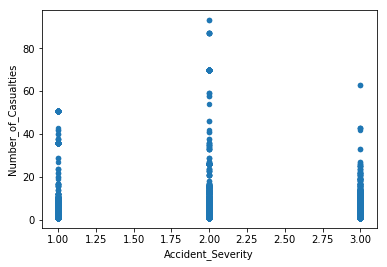

In [155]:
data.plot.scatter('Accident_Severity', 'Number_of_Casualties')

In [41]:
from IPython.display import display

pd.options.display.max_columns = None

I would like to investigate more closely accidents from: 04/11/2011, 05/09/2013, 14/02/2015 just so to remind us that this is real life data. That's someones real life stories:

**04/11/2011**: mass of crashed vehicles described by emergency works as “the worst road traffic collision anoyone can remember”. 7 fatal victims, 51 injured and 34 cars taking part in this collision close to junction 25 of the M5’s northbound carriageway. Drivers reported a white wall of fog. People said that smoke from fireworks at the rugby club next to the motorway might have contributed to the poor visibility. There was also huge fireworks display that could distract the drivers. Cars that were driving slow managed to escape but cars speeding up with 60-70mph were just colliding one onto another. 3 lorries collide including one full of deodorants and cans. People were trapped in their vehicles and were screaming. 
[Video from the place of accident: ](https://www.youtube.com/watch?v=1ZdsxShKJe0)

*Just reading information from the data we know that*:
1. It was reported as fatal incident with 5 casualities. From the news we know that 7 so 5 people reported on the place and 2 passed in the hospital
2. It was friday at 8:23pm Local_Authority_(District) - Taunton Deane. 
3. That was on Motorway, dual carriageway with speed limit 70. Not on junction or not junction within 20 meters. 
4. No pedestrians involved. It was reported as daylight, which can't be true as that was November after 8pm. 
5. Weather condition from report as 9: Unknown but we know from press and reports that was fog, 100% humidity and dark outside, Road_Surface_Conditions: reported as 1 - dry That is not true as it was fog with humidity 100%
6. 6 Goods vehicles 7.5 tonnes mgw and over, 1 Van / Goods 3.5 tonnes mgw or under and rest normal cars
7. 3 female drivers and rest male drivers. 

*Important points for Analytics purposes*:
1. Important the severity is from 1 - 3 with 1 the highest
2. As that's interesting during data exploration this level is too granular and we won't include Local_Authority_(District) for our model
3. We can notice that we have multiple records for each accident as the details for vehicles are specific for particular vehicle.
4. We can remove the 1st_Road_Number and 2nd_Road_Number as does not say something relevant for the model
5. -1 in our data replaces missing number. Good to know how many missing data we really have in our dataset
6. Would be good to put incidents on map after removing duplicates
7. Do bar chrt for Age_Band_of_Driver

In [44]:
data[(data['Date'] == '04/11/2011') & (data['Number_of_Vehicles'] == 34)]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Was_Vehicle_Left_Hand_Drive
1964887,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,1.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,6.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1964888,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,2.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,6.0,1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1964889,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,3.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,6.0,1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1964890,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,4.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,6.0,1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1964891,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,5.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,6.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1964892,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,6.0,21.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,6.0,1.0,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1964893,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,7.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,6.0,1.0,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1964894,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,8.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,6.0,1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1964895,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,9.0,21.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,4.0,1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1964896,2011520104001,326090.0,125620.0,-3.055272,51.025121,52,1,34,51,04/11/2011,6,20:23,608,E10000027,1,5,3,70.0,0,-1,-1,0,0,0,1,9,1,0,0,2,1,E01029317,10.0,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,1.0,1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


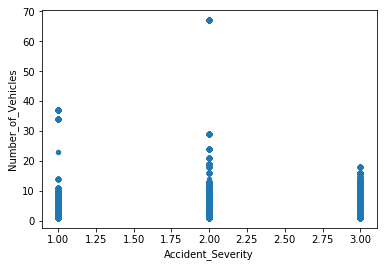

In [165]:
data.plot.scatter('Accident_Severity', 'Number_of_Vehicles')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'].str.strip(), format='%d/%m/%Y')